In [2]:
# 08.08 MACHINE LEARNING --- BOOK: INTRODUCTION TO MACHINE LEARNING WITH PYTHON
# CHAPTER 1, PAGE 14 (pdf: 28), IRIS DATA

In [3]:
import sklearn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

# introduction to the dataset - iris

In [4]:
type(iris_dataset) #Bunch class similar to dictionary

sklearn.utils._bunch.Bunch

In [6]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
iris_dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris_dataset['data'].shape

(150, 4)

In [12]:
len(iris_dataset['target'])

150

## the dataset contains 150 samples of flowers with 4 features, and the target contains the number of the species - 0,1 or 2. 
0 means setosa, 1 means versicolor, and 2 means virginica

# PROBLEM: Three-class classification problem 
### Three-class because there are 3 different species that we want to predict. Classification because we need to classify them!

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
#splitting the data to then use the model
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], 
                                                    train_size=0.75, random_state=1)

In [15]:
X_train.shape

(112, 4)

In [16]:
X_test.shape

(38, 4)

In [17]:
y_train.shape

(112,)

In [18]:
y_test.shape

(38,)

# Before making the model - let us inspect the data and visualize it

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

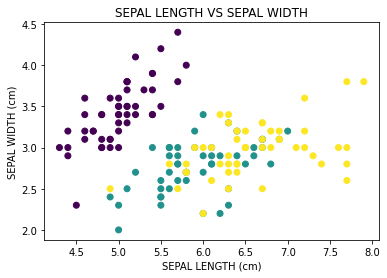

In [20]:
plt.xlabel("SEPAL LENGTH (cm)")
plt.ylabel("SEPAL WIDTH (cm)")
plt.title('SEPAL LENGTH VS SEPAL WIDTH')
plt.scatter(x = iris_dataset['data'][:,0], y = iris_dataset['data'][:,1], c = iris_dataset['target'])

In [21]:
import numpy as np
import pandas as pd

In [22]:
iris_dataframe = pd.DataFrame(data = iris_dataset['data'], columns = iris_dataset['feature_names'])

In [23]:
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [24]:
iris_dataframe['species'] = iris_dataset['target']

In [25]:
iris_dataframe[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


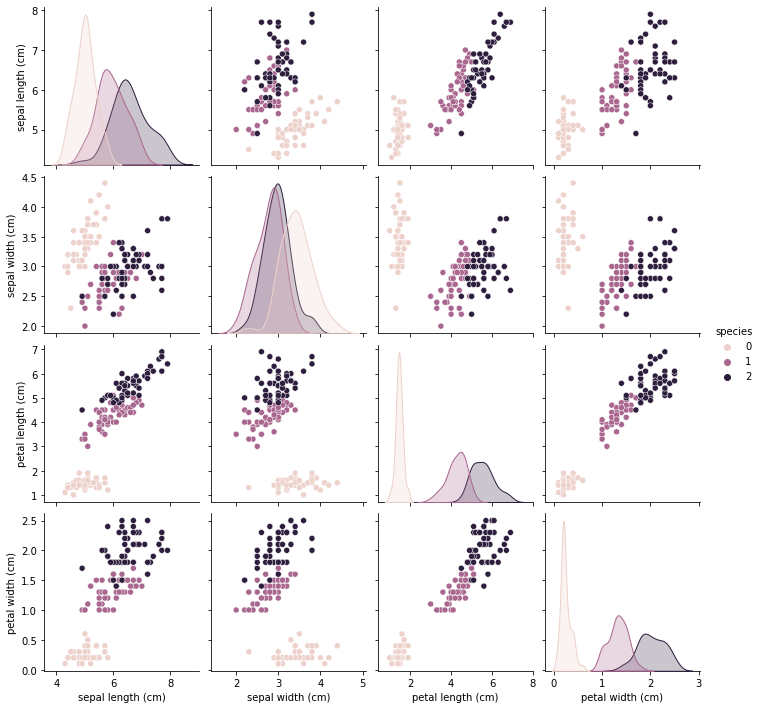

In [26]:
sns.pairplot(iris_dataframe, hue = "species")

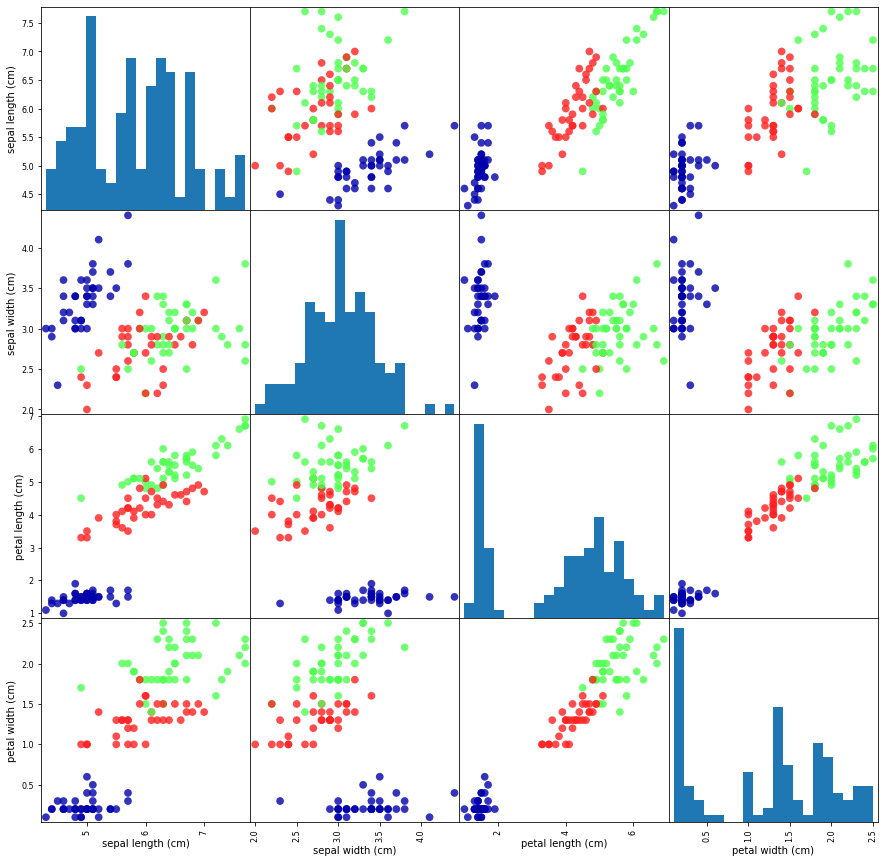

In [27]:
import mglearn
#Other way to do it:
iris_dataframe2 = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

grr = pd.plotting.scatter_matrix(iris_dataframe2, c=y_train, figsize=(15, 15), marker='o',
 hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

In [ ]:
#page 34

# Usage of the appropriate algorithm to build a ML model 
## 1. k-nearest neighbours

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
#initializing the object from the class to make ESTIMATOR
knn = KNeighborsClassifier(n_neighbors = 20) #as of now we will use 1 neighbour

In [75]:
#training the model by knn
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [76]:
#predicting the output of our test data
knn.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [77]:
y_test

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

# Checking the accuracy of our knn model

In [78]:
print(f"The accuracy of knn model is: {np.mean(knn.predict(X_test) == y_test)}")

The accuracy of knn model is: 0.9736842105263158


In [81]:
#other way to test accuracy 
knn.score(X_test, y_test)

0.9736842105263158

In [82]:
#page 39